# TMC - TV and Movie Cruncher Team

**CS506 Group Project**

**Team Members:**
* Moses Lee Cheuk Hin, ssugar00@bu.edu 
* John Spinelli, jspinell@bu.edu
* Shreya Pandit, shreyap@bu.edu

# Methodology on obtaining the data

In this group project, it is essentially dealing with two different sources: the YouTube, and the Movie Database. Essentially the project aims to build a prediction engine for movies - Important factors that relate to the success of a movie.

Movies uses YouTube as a mean of advertising, and it would be useful to develop a model to see if YouTube advertisement is effective or not.

**Step 1: extracting the list of movies and actor information**

In the beginning, We extracted the list of movies with at least 50 vote counts on IMDB, and the respective vote count, popularity and the vote score.

In [1]:
import pandas as pd
df1 = pd.read_csv('movieData.csv')
pd.options.display.max_rows = 5
df1.iloc[:,1:]

,Popularity,Release Date,Title,Vote Average,Vote Count,id
0,6.011808,2015-01-01,Taken 3,6.0,1864,260346
1,1.011477,2015-01-02,We Accept Miracles,5.6,87,315319
...,...,...,...,...,...,...
417,2.148478,2015-12-30,Anomalisa,6.9,366,291270
418,1.370002,2015-12-31,Baskin,5.9,59,334394


We have also extracted the top three important actors from each of these movies. This information is useful when we are trying to build a predictive model to the success of of a movie. The Ntlk would provide a package that indicates how much weight that each factor has in predicting the outcome of a movie and if the weight of a certain actor is large, we can then deduce that having that particular actor should 95% guarantee the success of a movie.

In [2]:
df2 = pd.read_csv('finalActorData.csv')
pd.options.display.max_rows = 5
df2.iloc[:,1:]

,Actor1 Id,Actor1 Name,Actor2 Id,Actor2 Name,Actor3 Id,Actor3 Name,Movie Id
0,3896,Liam Neeson,2178,Forest Whitaker,11825,Maggie Grace,260346
1,233334,Alessandro Siani,44648,Ana Caterina Morariu,78535,Fabio De Luigi,315319
...,...,...,...,...,...,...,...
407,10431,Jennifer Jason Leigh,11207,David Thewlis,119232,Tom Noonan,291270
408,107992,Muharrem Bayrak,1496324,Mehmet Cerrahoglu,1496325,Mehmet Faith Dokgoz,334394


**Step 2: Extract the YouTube Comments for each movies**

As we have proposed earilier that we can predict the outcome of a movie success from looking at the comments from the youtube videos related to a particular movie, we initally collect all the comments for the youtube videos that are related to each movie.

For example, the first movie in the list is **"Taken 3"**, we essentially do a query search on YouTube and collect all the comments from the **first 20 YouTube videos** that are most relevant to the search word **"Taken 3"**.

The rows of the table are the name of the YouTube videos that are most relevant to the first 50 movies. In this example, you can see the rows are **"TAKEN 3 | "He's Our Man" Clip [HD] | 20th Cent..."** , **"TAKEN 3 | "Rabbit Hole" Clip [HD] | 20th Centu..."** and so on which are **five out of twenty** YouTube videos that are related to the movie  **"Taken 3"**. The columns are the user id of all the users that commented on any of the YouTube videos related to the first 50 movies in the list (As we are collecting the data per 50 movies and going to combine it afterwards for quicker processing time). 

The value of the columns are NaN, only because the list of columns is very long and some of the user commented on other videos may not comment on the videos related to **Taken 3**,

In [121]:
df3 = pd.read_csv('New_data_50.csv', encoding = "ISO-8859-1")
pd.options.display.max_rows = 5
df3.iloc[538:543]

,Unnamed: 0,UC1QslR_hxbSiadMQXh4uuwA,UCF1g-Fc9kjo4olfQtSsT00w,UCwQx4KMdzjoH98cLDxHA8Dw,UChLkmNKX1Su9IsfLZYOJgwQ,UCdsF9_7w-sJUhNBk8zwwYCQ,UCO2iSC3Ii-3FI6wrHl-fL7w,UCL0ZFiNaq3IH5jkY8LPMCJA,UCC_SpJRqTRKJqQWLBXJRFTg,UCBSHX-MbauozHlMldUixSbw,...,UC02nbxo-fePxvC_94aqtWOQ,UCAJzfrratfu5ZvAfDqFrnIQ,UCbmAe72gGCm7iUoZT14-plg,UCQk5EEJfAoDlPTY2Dau6TbQ,UCx8ITohQ2Tq7UrJwpTBBimA,UCtNQ1FLuWfFsqgdhkLFgUOw,UCqW_vYAqUzJdS2NdmL4c-Fw,UCT-sWrKzzyd77JucoSUFmkA,UCr2kwbFaNDXiJUlGGE1hC9w,UCW1NSdW39raQDLbRGCyTRjg
538,"TAKEN 3 | ""He's Our Man"" Clip [HD] | 20th Cent...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,"TAKEN 3 | ""Rabbit Hole"" Clip [HD] | 20th Centu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,TAKEN 3 | Official Trailer [HD] | 20th Century...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,TAKEN 3: BAGELS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,TDW 1529 - Visiting Terminus from Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have also combined the whole data into the following format, in order to match the movie v.s. popularity table that we previously have:

In [4]:
df4 = pd.read_csv('New_combined_data_50.csv', encoding = "ISO-8859-1")
pd.options.display.max_rows = 5
df4.columns = ['/','Title','Text']
df4.iloc[18:,1:]

,Title,Text
18,Taken 3,You see this is what happens when you give you...
19,Tracers,EL PARKOUR ES MI VIDA MOTIVATE :)what's the na...
...,...,...
48,Daddy or Mommy,Pathe movies are always the best I love that k...
49,Vice,"Awesome !!!BLAKE IS A DRUNK PERIOD ,BIG MISTAK..."


In this csv file, it stores all the comments as a big blub of text. For example, all the comments of the 20 YouTube videos that are most relevant to the key word **"Taken 3"** is stored in the following manner:

In [5]:
df4['Text'].iloc[18]

'You see this is what happens when you give your daughter freedom she gets taken not just once, or twice but three timesPRINCE d hd v isha.sadhguru.org ki paanch \r\n,,,,,,,,,,,,,,,    isha.sadhguru.org kiPRINCE d hd v isha.sadhguru.org kiPRINCE d hd v isha.sadhguru.org kiPrinceRegardlessI AM ME.Schindler is Sad: The MovieIf you a fan of this type of movie, I recommend watching "the Man from Nowhere." korean version of this movie. hope you enjoyWho\'s the dad of Kim\'s child?liam neeson needs to complete his final transformation into optimus prime? he has thr same voice as peter cullinYou know the studios needs to do, a tough guy cross-over movie, with for instance Bryan Mills and The Equalizer teaming up, how cool would that be ?Taken 4: They took his house\r\nTaken 5: They took his granddaughter\r\nTaken 6:  They took his great-granddaughter\r\nTaken 7: They took his medication\r\nTaken 8: They took his gravestone\r\nTaken 9: They took his soul\r\nTaken 10: They took his whole world"

This table is then able to merged with the previous table from the moviedatabase for further analysis, using sentiment analysis.

------------------------

# Basic data analysis

In [6]:
split_1 = pd.read_csv('New_combined_data_50.csv', encoding = "ISO-8859-1")
split_2 = pd.read_csv('New_combined_data_50_100.csv', encoding = "ISO-8859-1")
split_3 = pd.read_csv('New_combined_data_100_150.csv', encoding = "ISO-8859-1")
split_4 = pd.read_csv('New_combined_data_150_200.csv', encoding = "ISO-8859-1")
split_5 = pd.read_csv('New_combined_data_250_300.csv', encoding = "ISO-8859-1")
split_6 = pd.read_csv('New_combined_data_300_350.csv', encoding = "ISO-8859-1")
split_7 = pd.read_csv('New_combined_data_350_all.csv', encoding = "ISO-8859-1")

combined_df = split_1.append(split_2.append(split_3.append(split_4.append(split_5.append(split_6.append(split_7))))))
combined_df.columns = ['/','Title','Text']
combined_df

,/,Title,Text
0,0,The Atticus Institute,Atticus Institute: from the producers of THE C...
1,1,Everly,Dat ass thoSooo this is like Smokin aces..am i...
...,...,...,...
66,66,Spotlight,she is so freaking pretty idk what nobody sayI...
67,67,The Lion Guard: Return of the Roar,the cut seens are so annoyingIn case you didn...


In [7]:
df5 = pd.DataFrame.merge(df1, combined_df, on ='Title')
df5.iloc[:,1:]

,Popularity,Release Date,Title,Vote Average,Vote Count,id,/,Text
0,6.011808,2015-01-01,Taken 3,6.0,1864,260346,18,You see this is what happens when you give you...
1,1.011477,2015-01-02,We Accept Miracles,5.6,87,315319,30,Fake Muslim Syndrome is not an uncommon phenom...
...,...,...,...,...,...,...,...,...
366,2.148478,2015-12-30,Anomalisa,6.9,366,291270,5,"Excruciating, as usual. Charlie Kaufman is the..."
367,1.370002,2015-12-31,Baskin,5.9,59,334394,37,What is the name of the Music?im gonna ask thi...


In [8]:
pd.options.display.max_rows = 10
df5.iloc[:,1:].sort_values('Popularity', ascending=False)

,Popularity,Release Date,Title,Vote Average,Vote Count,id,/,Text
160,43.112525,2015-06-09,Jurassic World,6.5,6725,135397,34,me encanta la ame demasiado es mi peli favorit...
130,29.698128,2015-05-13,Mad Max: Fury Road,7.2,7538,76341,31,My faith in good action movies is slightly res...
85,14.537912,2015-04-01,Furious 7,7.3,3403,168259,2,Not gonna cry. Not gonna cry. Notgonnacr-\n\n1...
178,11.606542,2015-06-23,Terminator Genisys,5.8,3061,87101,25,helena bonham carter is skynet!Kyle Reese is a...
349,11.465879,2015-12-15,Star Wars: The Force Awakens,7.5,6348,140607,46,Don't like the new actors.They don't know how ...
...,...,...,...,...,...,...,...,...
176,1.042855,2015-06-19,Ahora o nunca,5.3,62,300601,23,eres mi vida corina smith!!!! TE AMOo!!La Amo ...
300,1.040482,2015-10-22,Io che amo solo te,5.2,56,363757,24,Meravigliosa canzoneAscoltate Endrigo altro pi...
344,1.027580,2015-12-09,Uncompleted Song,7.2,123,366564,20,vous avez ou je peux trouver une version du fi...
299,1.013498,2015-10-22,Game Therapy,4.6,56,364470,9,? bello il film ma ? triste alla fineora subit...


In [9]:
listlist = df5['Popularity'].iloc[-20:].tolist()
listlist2 = df5['Popularity'].iloc[:70].tolist()
#df5['Popularity'].iloc[-20:] + df5['Popularity'].iloc[:70]
listlist += listlist2

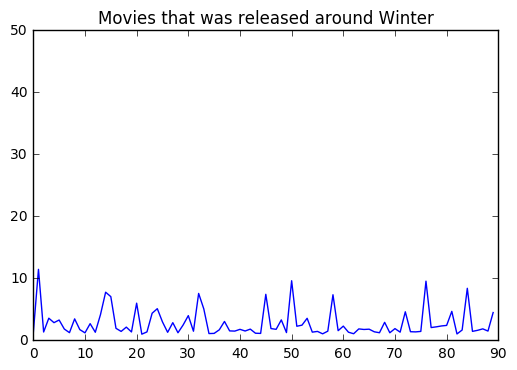

The mean popularity value is: 2.78136036667
The standard deviation popularity value is: 2.22366907356


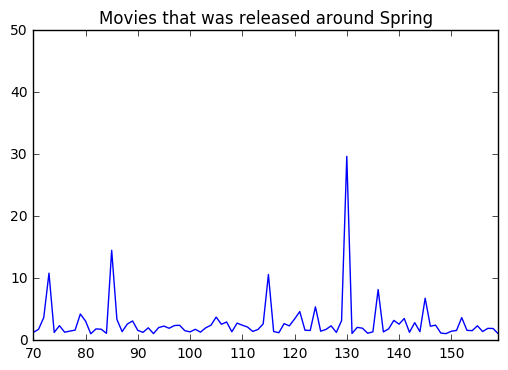

The mean popularity value is: 2.865469333333333
The standard deviation value is: 3.5754131274168848


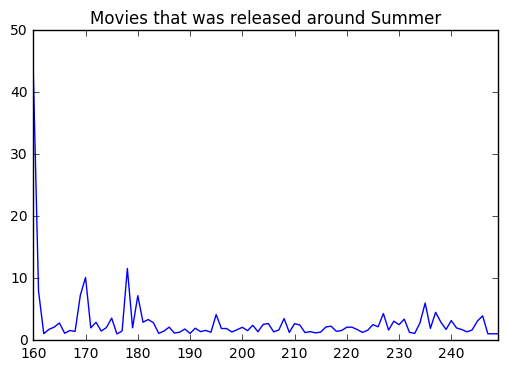

The mean popularity value is: 2.9287961555555575
The standard deviation popularity value is: 4.6641369292879915


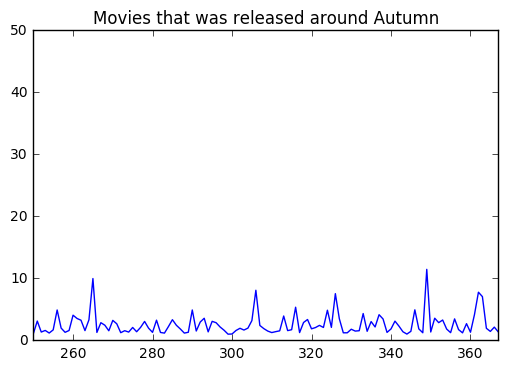

The mean popularity value is: 2.5771982118644066
The standard popularity value is: 1.7750486368942981


In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(50)
#plt.axis('off')
plt.title('Movies that was released around Winter')
plt.ylim(0, 50)
plt.plot([i for i in range(90)], listlist )
plt.show()
print('The mean popularity value is:', np.mean(listlist))
print('The standard deviation popularity value is:', np.std(listlist))

plt.figure(51)
plt.title('Movies that was released around Spring')
plt.ylim(0, 50)
df5['Popularity'].iloc[70:160].plot(kind='line')
plt.show()
print('The mean popularity value is:',df5['Popularity'].iloc[70:160].mean())
print('The standard deviation value is:',df5['Popularity'].iloc[70:160].std())

plt.figure(52)
plt.title('Movies that was released around Summer')
plt.ylim(0, 50)
df5['Popularity'].iloc[160:250].plot(kind='line')
plt.show()
print('The mean popularity value is:',df5['Popularity'].iloc[160:250].mean())
print('The standard deviation popularity value is:',df5['Popularity'].iloc[160:250].std())

plt.figure(53)
plt.title('Movies that was released around Autumn')
plt.ylim(0, 50)
df5['Popularity'].iloc[250:].plot(kind='line')
plt.show()
print('The mean popularity value is:',df5['Popularity'].iloc[250:].mean())
print('The standard popularity value is:',df5['Popularity'].iloc[250:].std())

From this basic analysis, we can see that the release date of a movie does not quite correlate with the popularity of the movie. However, the movies that gets released in the summer seem to have a higher popularity than other seasons, but without a t-test on the this statement, one cannot conclude that there is a significant correlation.

Therefore, we also look at the correlation between release date and movie vote.

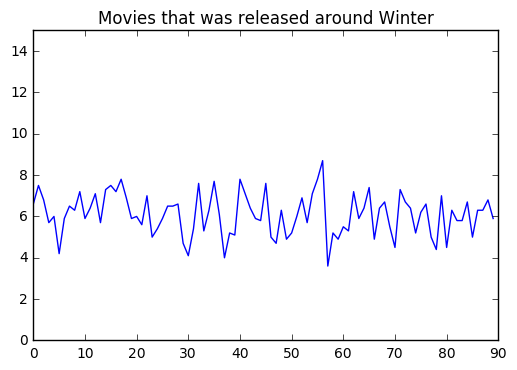

The mean popularity value is: 6.09888888889
The standard deviation popularity value is: 2.22366907356


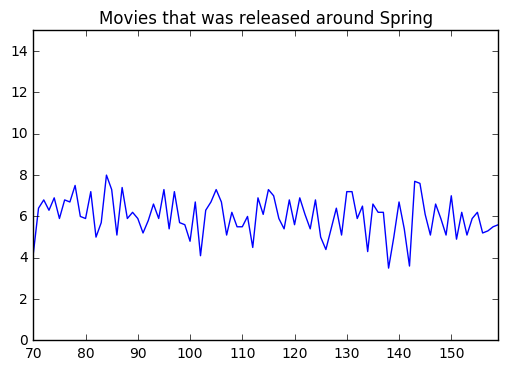

The mean popularity value is: 6.011111111111111
The standard deviation value is: 0.9474323010345885


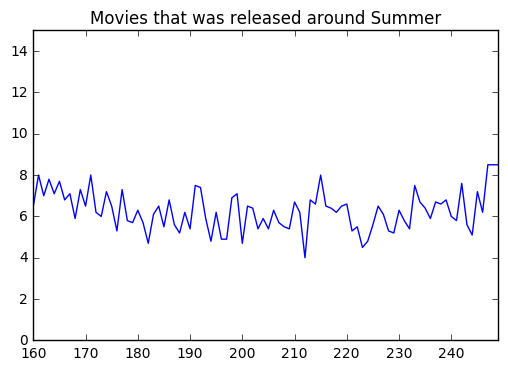

The mean popularity value is: 6.276666666666667
The standard deviation popularity value is: 0.9527075550205627


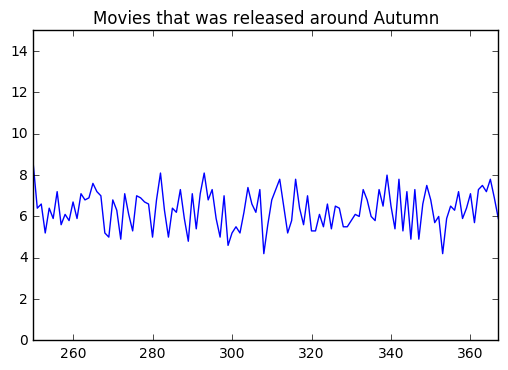

The mean popularity value is: 6.338135593220338
The standard popularity value is: 0.907228284912081


In [11]:
listlist3 = df5['Vote Average'].iloc[-20:].tolist()
listlist4 = df5['Vote Average'].iloc[:70].tolist()
#df5['Popularity'].iloc[-20:] + df5['Popularity'].iloc[:70]
listlist3 += listlist4

import matplotlib.pyplot as plt
import numpy as np
plt.figure(50)
#plt.axis('off')
plt.title('Movies that was released around Winter')
plt.ylim(0, 15)
plt.plot([i for i in range(90)], listlist3 )
plt.show()
print('The mean popularity value is:', np.mean(listlist3))
print('The standard deviation popularity value is:', np.std(listlist))

plt.figure(51)
plt.title('Movies that was released around Spring')
plt.ylim(0, 15)
df5['Vote Average'].iloc[70:160].plot(kind='line')
plt.show()
print('The mean popularity value is:',df5['Vote Average'].iloc[70:160].mean())
print('The standard deviation value is:',df5['Vote Average'].iloc[70:160].std())

plt.figure(52)
plt.title('Movies that was released around Summer')
plt.ylim(0, 15)
df5['Vote Average'].iloc[160:250].plot(kind='line')
plt.show()
print('The mean popularity value is:',df5['Vote Average'].iloc[160:250].mean())
print('The standard deviation popularity value is:',df5['Vote Average'].iloc[160:250].std())

plt.figure(53)
plt.title('Movies that was released around Autumn')
plt.ylim(0, 15)
df5['Vote Average'].iloc[250:].plot(kind='line')
plt.show()
print('The mean popularity value is:',df5['Vote Average'].iloc[250:].mean())
print('The standard popularity value is:',df5['Vote Average'].iloc[250:].std())

From this plot, we can be 95% sure that there is no correlation between the release date of a movie and the average vote rating that users give to this movie. Therefore, simply by looking at this data, we can be sure that the data is uniformally distributed such that there is no significant bias in our data. Further investigation conducted on this data set would not be greatly affected by abnormality in the data.



# Correlation in Data: 

In this section, we investigated the correlation within the data in deep:

In [14]:
df5['Length'] = df5['Text']
for i in range(368):
    df5['Length'].iloc[i] = len(df5['Text'].iloc[i])
df5

C:\Users\Moses\Anaconda3\envs\pyv4\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,Popularity,Release Date,Title,Vote Average,Vote Count,id,/,Text,Length
0,0,6.011808,2015-01-01,Taken 3,6.0,1864,260346,18,You see this is what happens when you give you...,71690
1,1,1.011477,2015-01-02,We Accept Miracles,5.6,87,315319,30,Fake Muslim Syndrome is not an uncommon phenom...,55408
2,2,1.378419,2015-01-07,Serial Killer 1,7.0,66,307103,10,get these devils. they should pay with pain an...,115011
3,3,4.389361,2015-01-13,Blackhat,5.0,689,201088,17,Lol at all the comments saying that this is on...,124214
4,4,5.122899,2015-01-14,Wild Card,5.4,576,265208,36,"*Mickey Valen* is back! First with Meet Me, no...",107598
...,...,...,...,...,...,...,...,...,...,...
363,414,7.067254,2015-12-25,The Hateful Eight,7.5,3162,273248,40,Great movieThe Hateful Eight\r\nThe Magnificen...,133284
364,415,1.956017,2015-12-25,A Man Called Ove,7.2,126,348678,43,Just got from Netflix and watched last night.?...,13499
365,416,1.456198,2015-12-26,And Then There Were None,7.8,53,371758,15,One of my favourite movies of all time.The end...,64344
366,417,2.148478,2015-12-30,Anomalisa,6.9,366,291270,5,"Excruciating, as usual. Charlie Kaufman is the...",128748


In [113]:
df6 = df5.sort_values(by='Vote Average')
df6['Popularity'] = df6['Popularity'].values.astype(np.float)
df6['Vote Average'] = df6['Vote Average'].values.astype(np.float)
df6['Vote Count'] = df6['Vote Count'].values.astype(np.float)

In [110]:
df6.columns = ['useless1','Popularity','Release Date','Title','Vote Average','Vote Count','id','useless2','Text','Length']
df6 = df6.drop('useless1', 1)
df6 = df6.drop('useless2', 1)

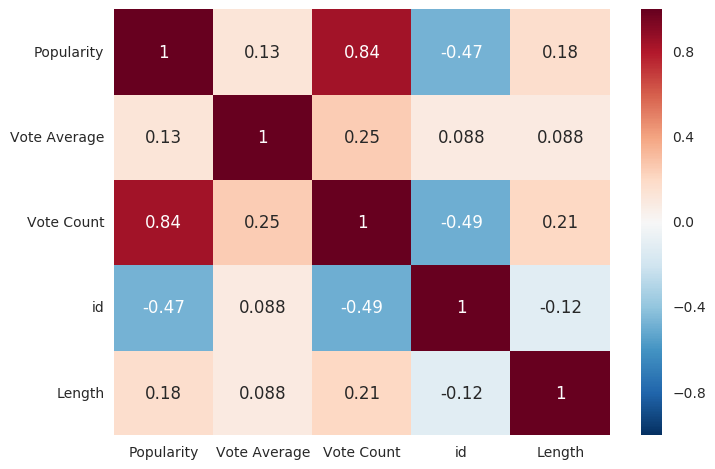

In [120]:
import seaborn as sns
corr = df6.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

From the plot, it can be seen that the number of words in the comments of the youtube videos that is related to a movie is somehow correlated to the vote count and popularity of the movie. This being said, the more popular a movie is, the more comments that users will comment on YouTube. Also, the more vote count that is received on IMBD about a particular movie, the more comments that users will comment on YouTube.

--------------